In [1]:
from movie_utils import *
from get_features import *

### Load in spectral data and headers

In [5]:
fhand = np.load('/data1/userspace/bpanos/multiline/lvl2C/MgII/FL_20140329_140938_3860258481.npz', allow_pickle=True)
data = fhand['data']
hdrs = fhand['headers']

### Load in SJI data

In [7]:
obs = observation('/data2/iris/2014/03/29/20140329_140938_3860258481/', keep_null=True)
ind = np.where( obs.sji.get_lines()['wavelength'] == 1400.0  )[0][0] # index for the 1400 SJI
sji = obs.sji[ind]
raster = obs.raster( line )

(540, 1094, 1102)

### Use the sji_mapper class to create SJI animations

In [10]:
# create a movie object
mapper = quantize_spectra(data, raster, sji, hdrs, mode='cluster', hmap='Oranges_r')

In [11]:
# cluster with k-means
kmeans = mapper.mini_batch_k_means( data, n_clusters=20, batch_size=1000 )

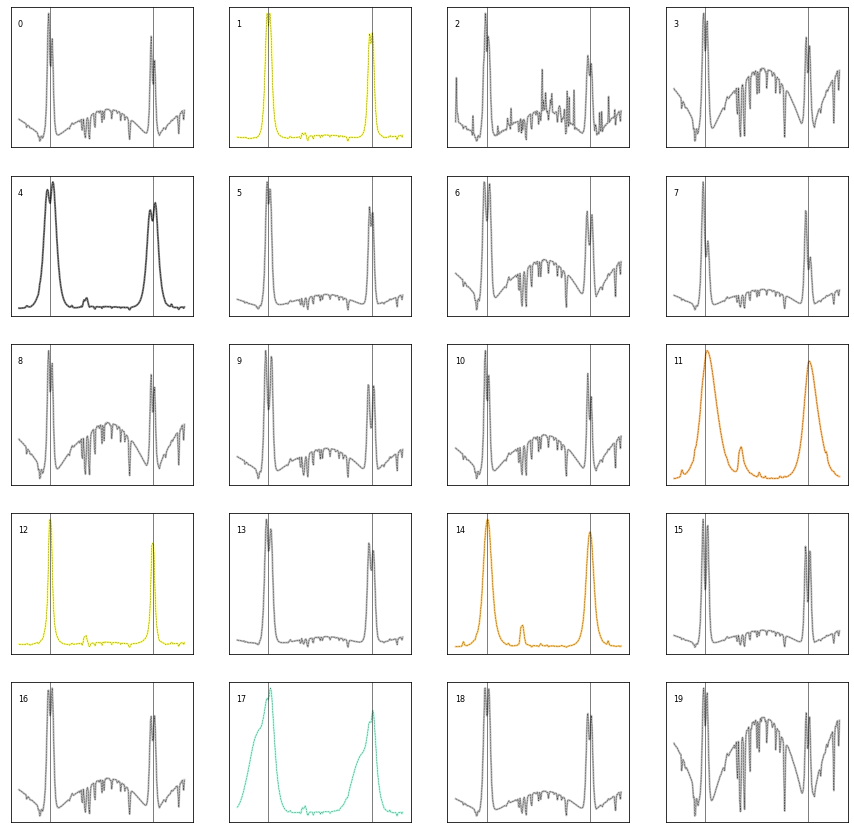

In [19]:
# set colors for SJI masks
colors = {11:'darkorange',
          4:'black',
          14:'orange',
          17:'aquamarine',
          12:'yellow', 1:'yellow'}
centroid_summary( kmeans['centroids'], colors, rows=5, cols=4 )

In [21]:
# animiate the SJI masks
mapper.animate(colors,
               kmeans['labels'], 
               gamma=.2,
               marker_size=20,
               transparency=.1,
               x_range=[70,1000],
               y_range=[100,1000],
               save_path='/data1/userspace/bpanos/multiline/movies/1001.mp4')

### Use the quantize_spectra class to create feature animations

In [2]:
# read in lvl2C and lvl2B data
obs = np.load( '/data1/userspace/bpanos/multiline/lvl2C/MgII/FL_20140329_140938_3860258481.npz' )
data = obs['data']
nprof = profile_rep( data )

dn_obs = np.load( '/data1/userspace/bpanos/multiline/lvl2B/MgII/FL_20140329_140938_3860258481.npz' )
dn_data = dn_obs['data']
dn_nprof = profile_rep( dn_data )

# extract features from the observation 
features = feature_transform( nprof, dn_nprof )

1) intensity
2) quartile analysis 
3) k2 peak analysis
4) continuum
5) triplet emission
6) k/h ratio


In [3]:
# every column is associated with a different feature
features.shape

(131280, 12)

In [10]:
# create a movie object
mapper = quantize_spectra(data, raster, sji, hdrs, mode='features', hmap='Oranges')

In [11]:
# animiate the SJI masks
colors = {1:'grey'}
intensities = features[:,0]
mapper.animate(colors,
               intensities, 
               gamma=.2,
               marker_size=12,
               transparency=.4,
               x_range=[70,1000],
               y_range=[100,1000],
               save_path='/data1/userspace/bpanos/multiline/movies/1002.mp4')

In [27]:
# create a movie object but change the heatmap color 
mov = quantize_spectra(data, raster, sji, hdrs, mode='features', hmap='Blues')

# animiate the SJI masks
colors = {1:'grey'}
kh_ratio_integrated = features[:,7]
mapper.animate(colors,
               kh_ratio_integrated, 
               gamma=.2,
               marker_size=12,
               transparency=.4,
               x_range=[70,1000],
               y_range=[100,1000],
               save_path='/data1/userspace/bpanos/multiline/movies/1002.mp4')

In [34]:
# create a movie object but change the heatmap color 
mov = quantize_spectra(data, raster, sji, hdrs, mode='features', hmap='Reds')

# animiate the SJI triplet intensity masks
colors = {1:'grey'}
triplet_intesity = features[:,1]
mapper.animate(colors,
               triplet_intesity, 
               gamma=.2,
               marker_size=12,
               transparency=.4,
               x_range=[70,1000],
               y_range=[100,1000],
               save_path='/data1/userspace/bpanos/multiline/movies/1002.mp4')

In [33]:
# create a movie object but change the heatmap color 
mov = quantize_spectra(data, raster, sji, hdrs, mode='features', hmap='YlOrBr')

# animiate the SJI triplet emission masks
colors = {1:'grey'}
triplet_emission= features[:,6]
mapper.animate(colors,
               triplet_emission, 
               gamma=.2,
               marker_size=12,
               transparency=.4,
               x_range=[70,1000],
               y_range=[100,1000],
               save_path='/data1/userspace/bpanos/multiline/movies/1002.mp4')